In [8]:
from model import UNet
from PIL import Image
from torchvision import transforms
from dataset import GTAData
from utils import create_dataloaders
import matplotlib.pyplot as plt
from torch import optim
import torch.nn as nn
import torch

In [9]:
transform = transforms.Compose([transforms.Resize((512, 512)), transforms.ToTensor()])
categories = [0, 7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
GTADataset = GTAData(root_dir="data", transforms=transform, categories=categories)

train_loader, val_loader = create_dataloaders(GTADataset, batch_size=1, test_size=0.2)

length Traindata: 2000
length Valdata: 500


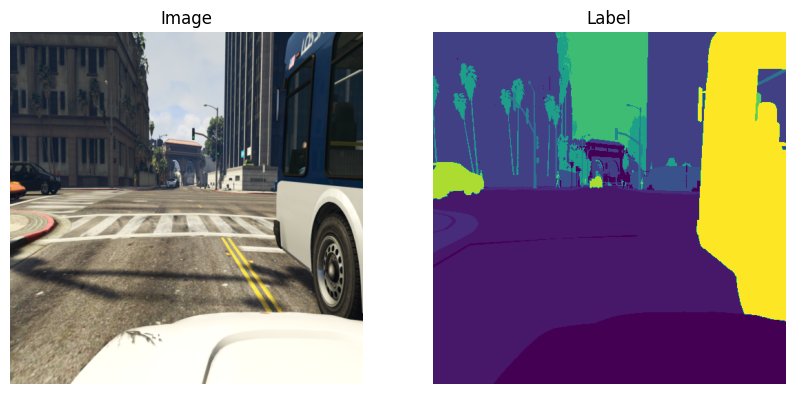

In [10]:
import matplotlib.pyplot as plt

for image, label in train_loader:
    image = image[0].permute(1, 2, 0).numpy()  # Permute dimensions from (C, H, W) to (H, W, C)
    label = label[0].numpy()

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the image
    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[0].axis('off')

    # Plot the label
    axes[1].imshow(label)
    axes[1].set_title('Label')
    axes[1].axis('off') 

    plt.show()

    break  


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

model = UNet(3, len(categories))
model = model.to(device)
num_epochs = 3
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.99)
criterion = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    num_train_batches = 0
    for batch in train_loader:
        num_train_batches += 1
        
        data, target = batch
        data, target = data.to(device, dtype=torch.float32), target.to(device, dtype=torch.long)

        optimizer.zero_grad()
        pred = model(data)
        loss = criterion(pred, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

        if num_train_batches % 100 == 0:
            print(f'Epoch {epoch}, Train Loss: {loss.item()}')

    cum_loss = 0
    num_val_batches = 0
    model.eval()
    with torch.no_grad():
        for batch in test_loader:
            num_val_batches += 1
            data, target = batch
            data, target = data.float().to(device), target.long().to(device)

            pred = model(data)
            loss = criterion(pred, target)
            cum_loss += loss.item()

    print(f"Epoch {epoch}, Validation Loss: {cum_loss/num_val_batches}")  